In [22]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [23]:
df = pd.read_csv('notebooks/data/20230413_clb_taps.csv')
# df['Datetime'] = pd.to_datetime(df['Datetime'])
# entry_df = df.set_index('Datetime')
# entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
# entry_df.columns = ['timestamp', 'entry_counts']
# entry_df

In [24]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [25]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

In [26]:
model = LibModel(df, lib_graph, exam_period=False)
model.run()
results = model.datacollector.get_model_vars_dataframe()
# results['timestamp'] = entry_df['timestamp']
# sns.lineplot(results, x='timestamp', y='num_agents')

<Axes: >

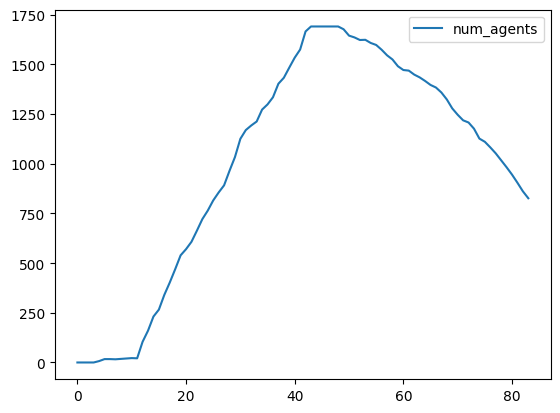

In [27]:
sns.lineplot(results)

In [28]:
results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,seat_type,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,movable_seat,250.0,250.0,0.000
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,4_man_seat,0.0,0.0,NaN
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,8_man_seat,0.0,0.0,NaN
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,window_seat,0.0,0.0,NaN
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,sofa,10.0,10.0,0.000
...,...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,sofa,0.0,0.0,NaN
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,soft_seat,0.0,0.0,NaN
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,cubicle,40.0,11.0,0.725
3778,2023-04-13 12:40:00+00:00,wbs_6-d_cubicle,wbs_6,d_cubicle,0.0,0.0,NaN


In [29]:
results2['section'].unique()

array(['clb_3-movable_seat', 'clb_3-4_man_seat', 'clb_3-8_man_seat',
       'clb_3-window_seat', 'clb_3-sofa', 'clb_3-soft_seat',
       'clb_3-cubicle', 'clb_3-d_cubicle', 'clb_3-diagonal_seat',
       'clb_4-movable_seat', 'clb_4-4_man_seat', 'clb_4-8_man_seat',
       'clb_4-window_seat', 'clb_4-sofa', 'clb_4-soft_seat',
       'clb_4-cubicle', 'clb_4-d_cubicle', 'clb_4-diagonal_seat',
       'clb_5-movable_seat', 'clb_5-4_man_seat', 'clb_5-8_man_seat',
       'clb_5-window_seat', 'clb_5-sofa', 'clb_5-soft_seat',
       'clb_5-cubicle', 'clb_5-d_cubicle', 'clb_5-diagonal_seat',
       'clb_6-movable_seat', 'clb_6-4_man_seat', 'clb_6-8_man_seat',
       'clb_6-window_seat', 'clb_6-sofa', 'clb_6-soft_seat',
       'clb_6-cubicle', 'clb_6-d_cubicle', 'clb_6-diagonal_seat',
       'wbs_6-movable_seat', 'wbs_6-4_man_seat', 'wbs_6-8_man_seat',
       'wbs_6-window_seat', 'wbs_6-sofa', 'wbs_6-soft_seat',
       'wbs_6-cubicle', 'wbs_6-d_cubicle', 'wbs_6-diagonal_seat'],
      dtype=object)

<Axes: xlabel='timestamp', ylabel='utilization_rate'>

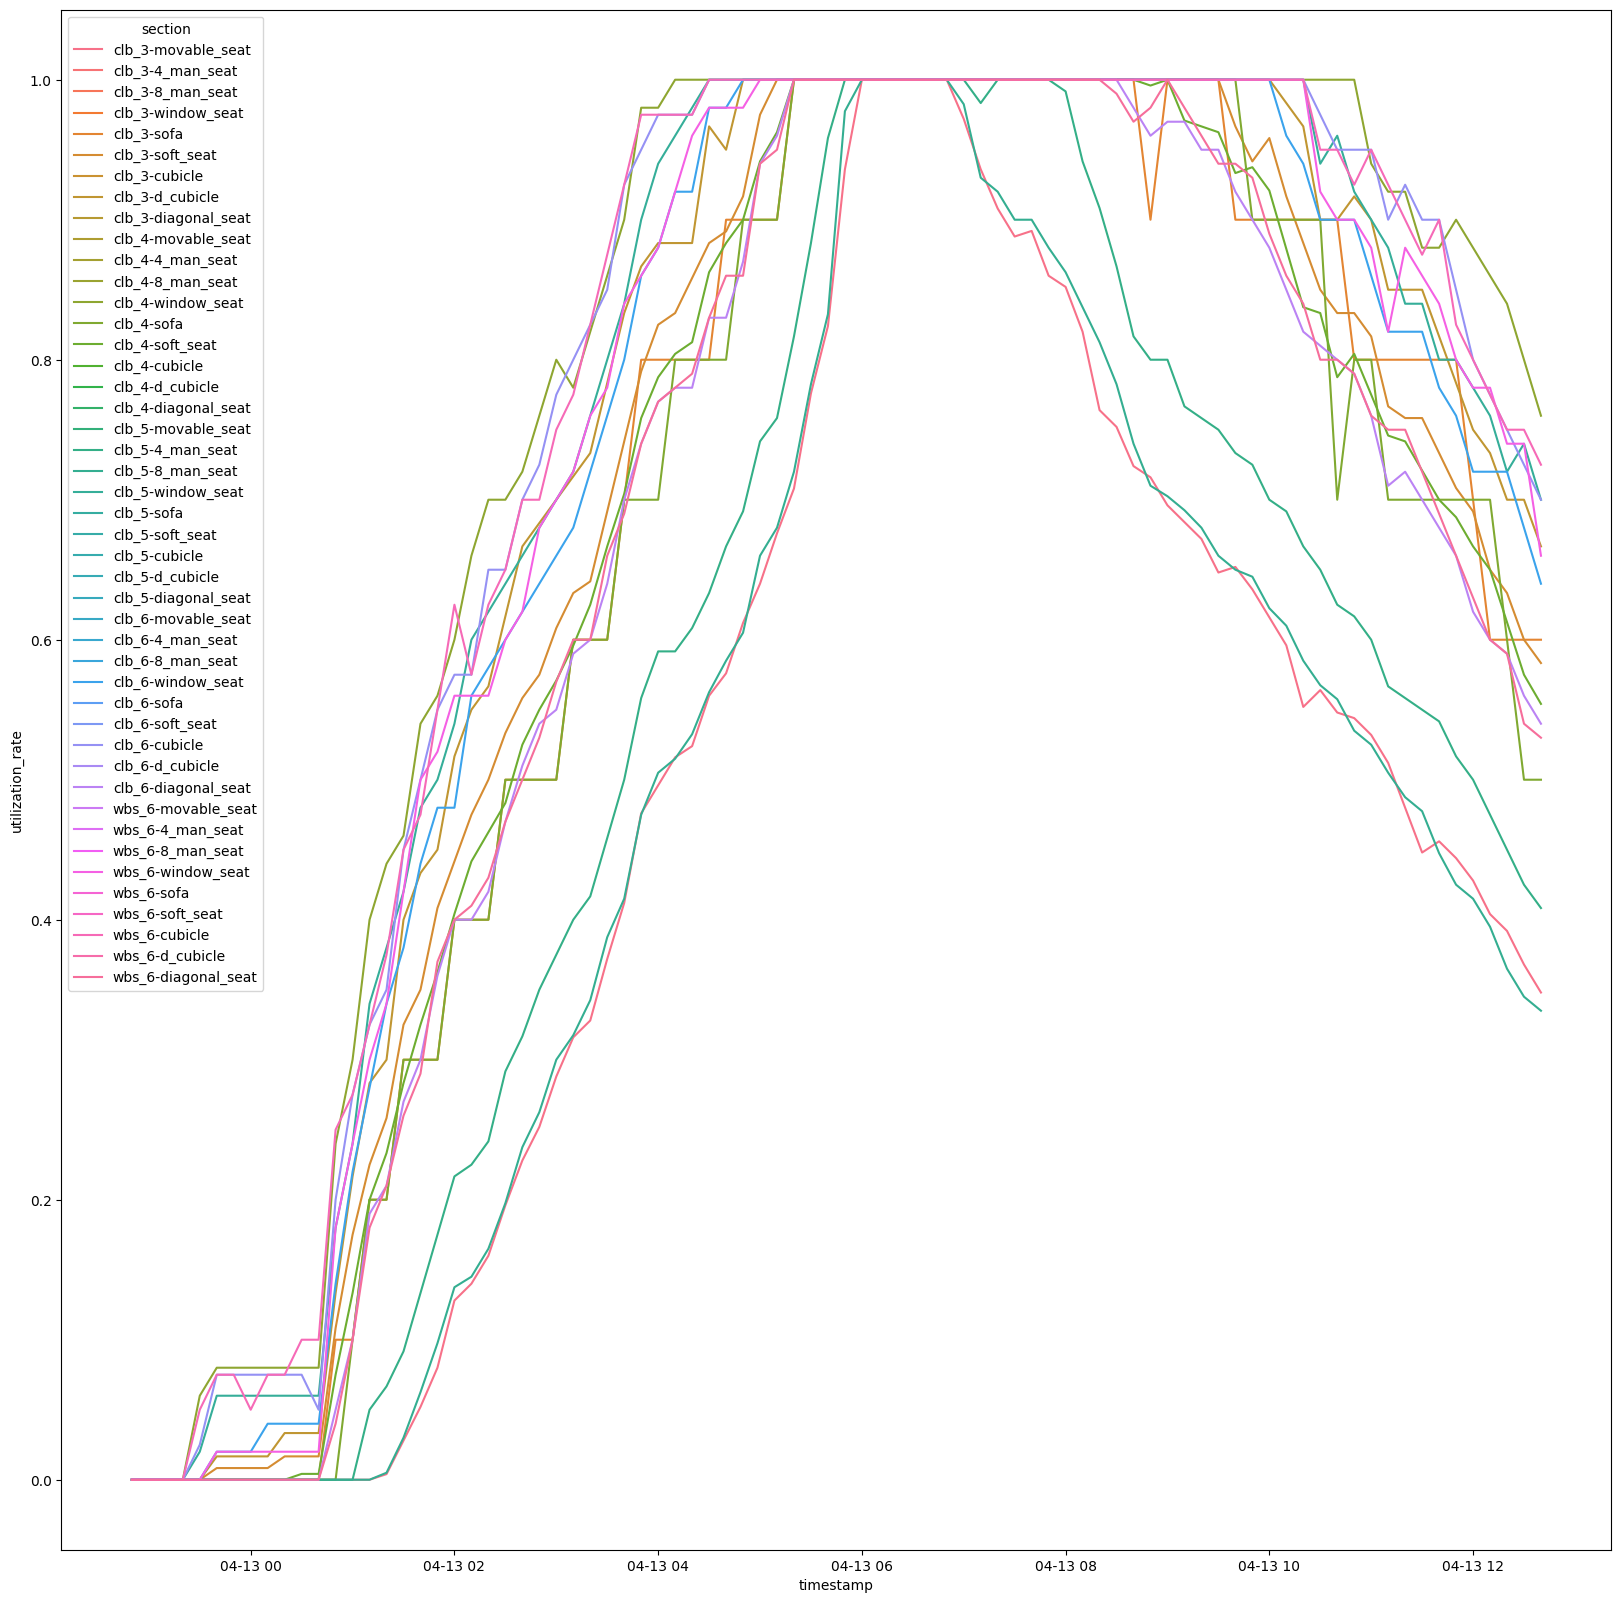

In [30]:
plt.figure(figsize=(20,20))
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='section')

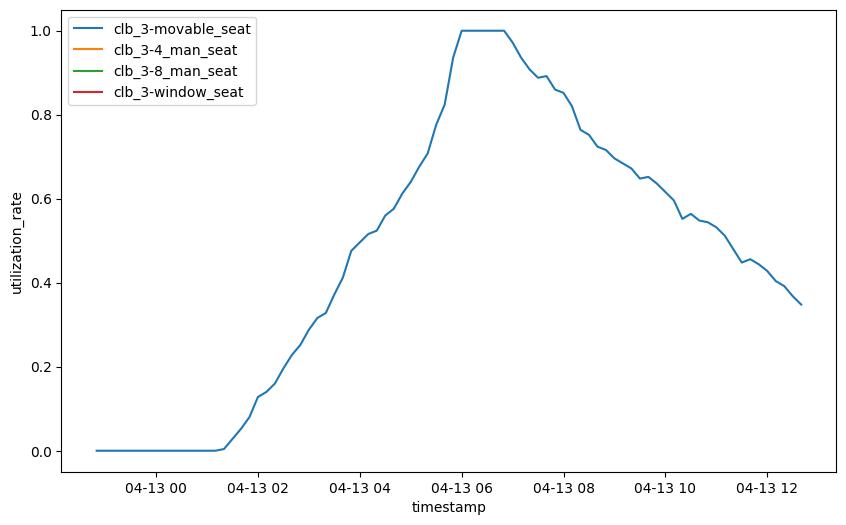

In [31]:
sections_to_plot = ['clb_3-4_man_seat', 'clb_3-8_man_seat', 'clb_3-window_seat', 'clb_3-movable_seat']
filtered_results = results2[results2['section'].isin(sections_to_plot)]

plt.figure(figsize=(10, 6))  # Define the size of the plot

# Plotting the filtered DataFrame
sns.lineplot(data=filtered_results, x='timestamp', y='utilization_rate', hue='section')
plt.legend(loc='upper left')  # Adjust the legend position as needed
plt.show()

<Axes: xlabel='timestamp', ylabel='utilization_rate'>

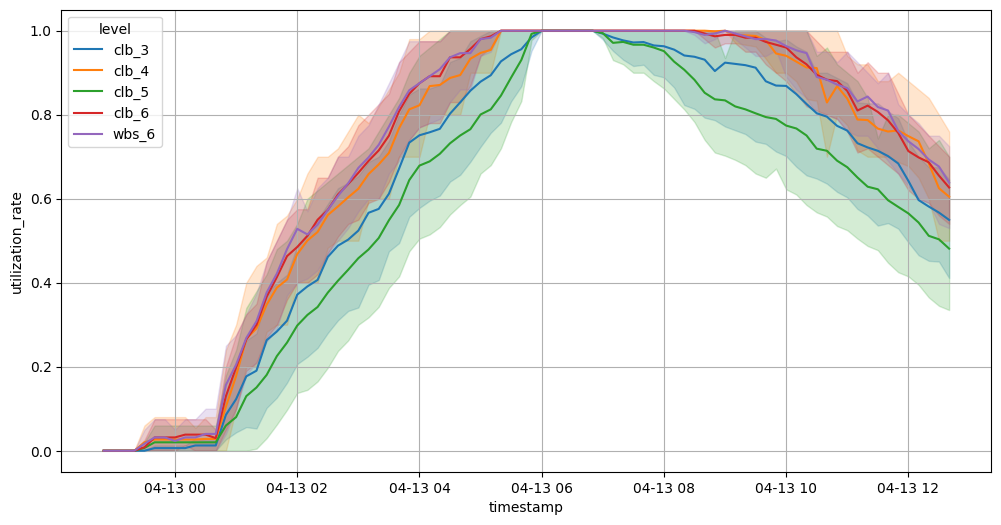

In [32]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='level')

<Axes: xlabel='timestamp', ylabel='empty_seats'>

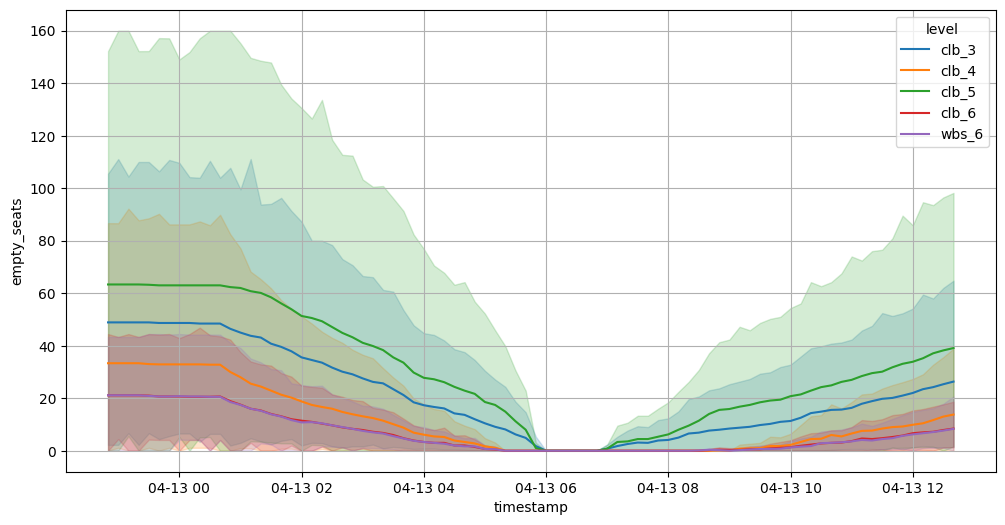

In [33]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='empty_seats', hue='level')

<Axes: xlabel='timestamp', ylabel='utilization_rate'>

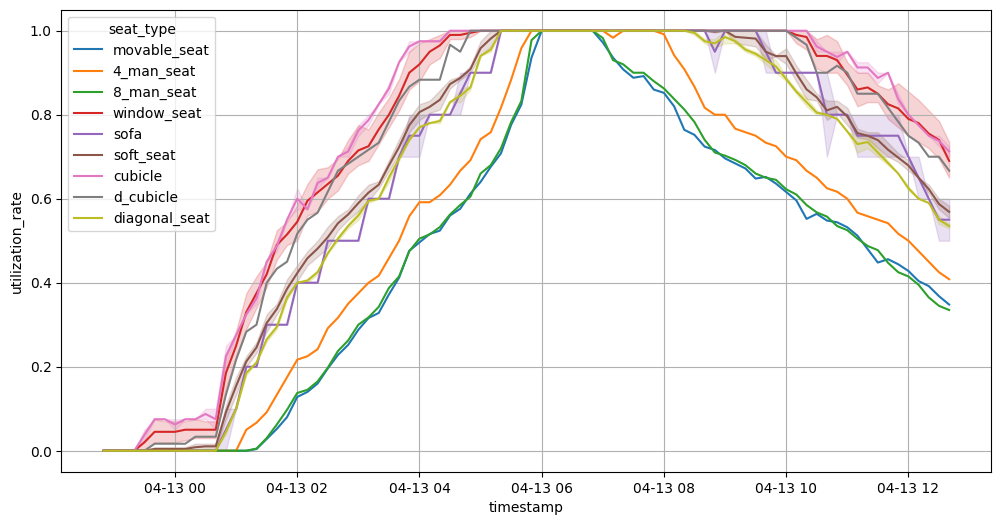

In [34]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='seat_type')

In [35]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                                 
4    4-0          wbs_6-cubicle      3.647939
     4-1      clb_4-window_seat      3.445094
     4-2      clb_4-window_seat      3.341723
     4-3          wbs_6-cubicle      3.548050
     4-4      clb_4-window_seat      3.279376
...                         ...           ...
83   82-8     clb_5-window_seat      2.938779
     82-9     clb_5-window_seat      2.951040
     83-0       clb_3-soft_seat      2.892024
     83-1       clb_3-soft_seat      2.825219
     83-2      clb_5-8_man_seat      2.946870

[84626 rows x 2 columns]

<Axes: xlabel='Step', ylabel='satisfaction'>

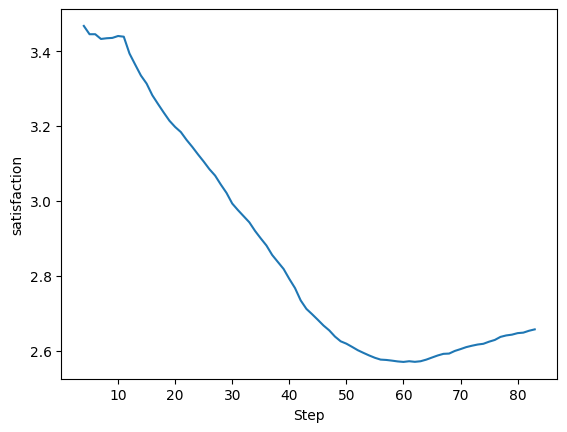

In [37]:
sns.lineplot(agents.reset_index().groupby('Step')['satisfaction'].mean().reset_index(), x='Step', y='satisfaction')

In [36]:
agents['satisfaction'].describe()

count    84626.000000
mean         2.733532
std          0.290733
min          1.872012
25%          2.528178
50%          2.696721
75%          2.931044
max          3.647939
Name: satisfaction, dtype: float64

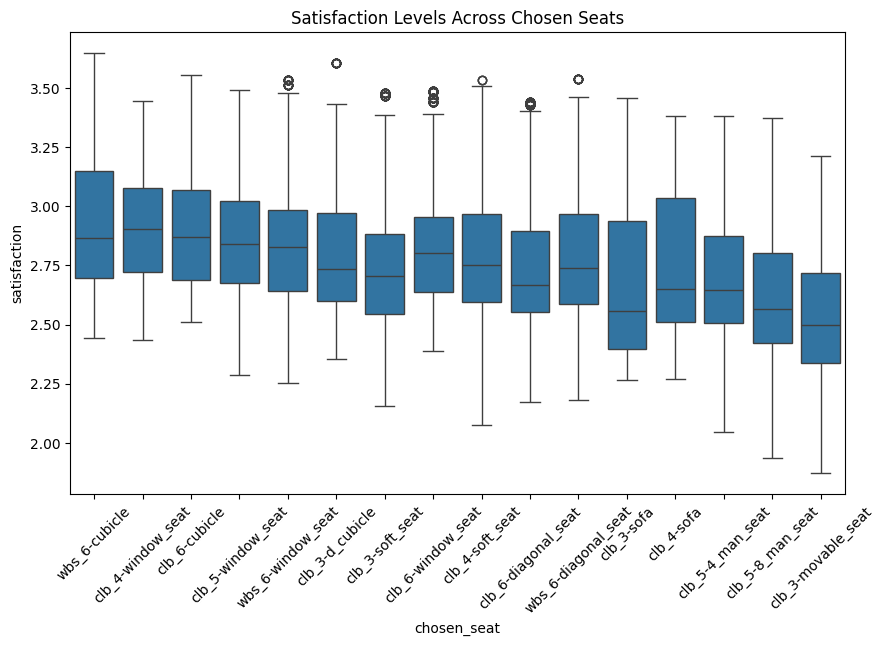

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=agents, x='chosen_seat', y='satisfaction')
plt.title('Satisfaction Levels Across Chosen Seats')
plt.xticks(rotation=45)
plt.show()

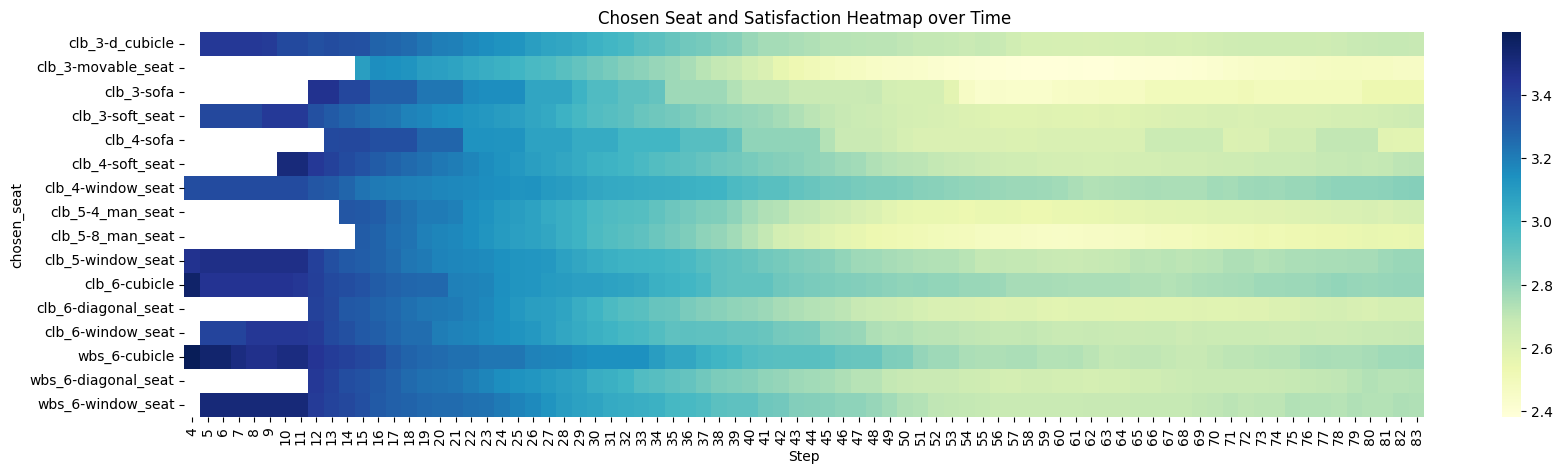

In [39]:
heatmap_data = agents.pivot_table(values='satisfaction', index='chosen_seat', columns=agents.index.get_level_values('Step'))
plt.figure(figsize=(20, 5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, fmt=".2f")

plt.title('Chosen Seat and Satisfaction Heatmap over Time')
plt.show()

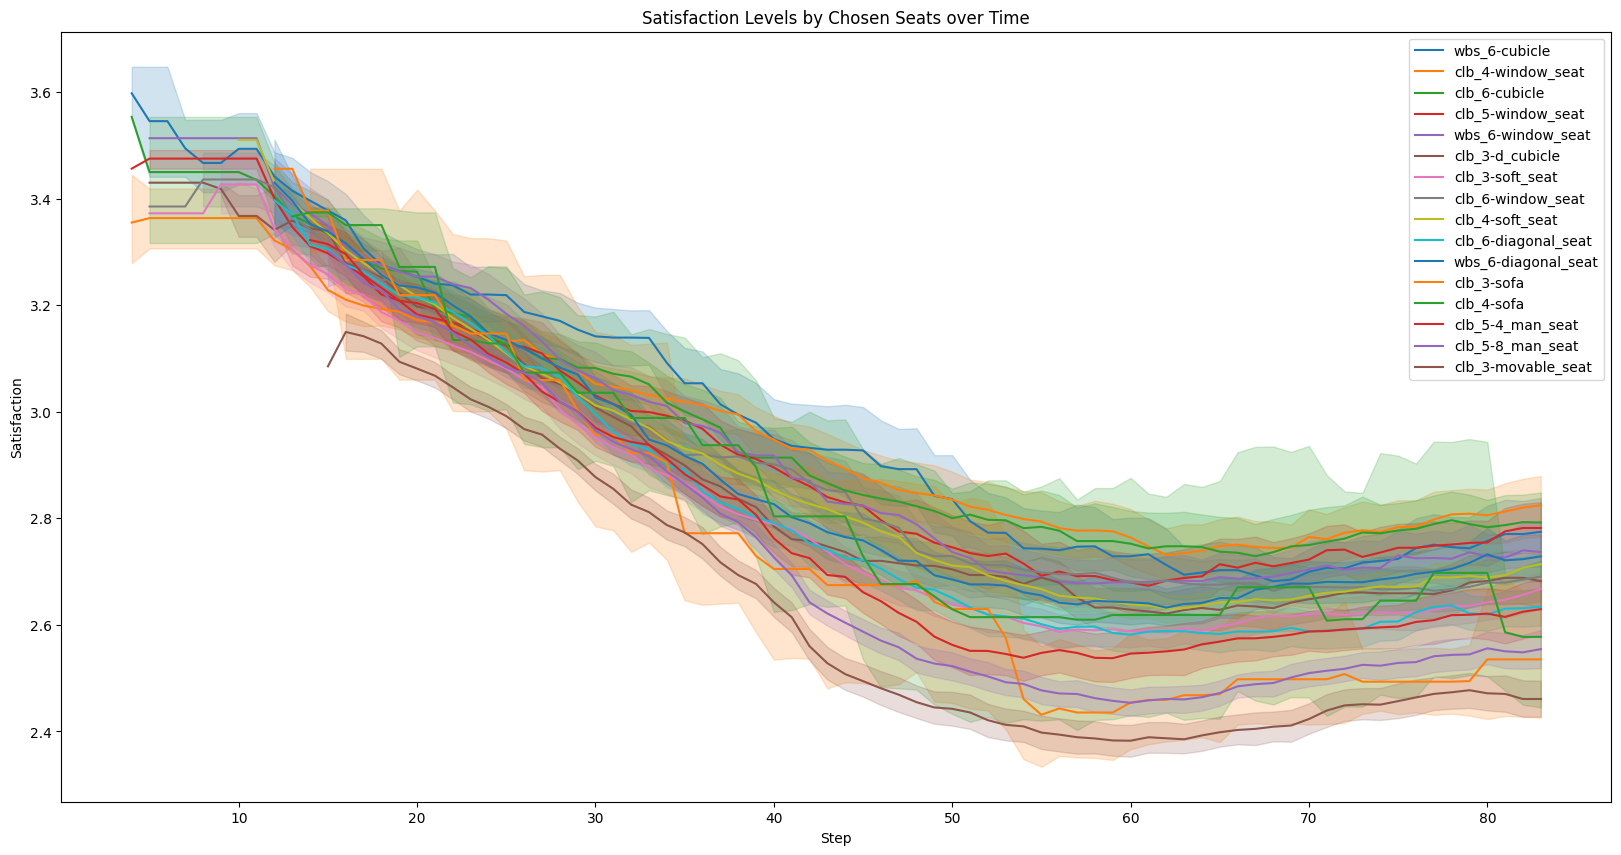

In [38]:


# Reformatting the table for easy plotting
satisfaction_data = agents.reset_index()
chosen_seats = satisfaction_data['chosen_seat'].unique()

plt.figure(figsize=(20, 10))


for seat in chosen_seats:
    data = satisfaction_data[satisfaction_data['chosen_seat'] == seat]
    sns.lineplot(x=data['Step'], y=data['satisfaction'], label=seat)

''' specific seat only
data = satisfaction_data[satisfaction_data['chosen_seat'] == 'clb_5-8_man_seat']
plt.plot(data['Step'], data['satisfaction'], label='clb_5-8_man_seat')
'''


plt.title('Satisfaction Levels by Chosen Seats over Time')
plt.xlabel('Step')
plt.ylabel('Satisfaction')
plt.legend()
plt.show()

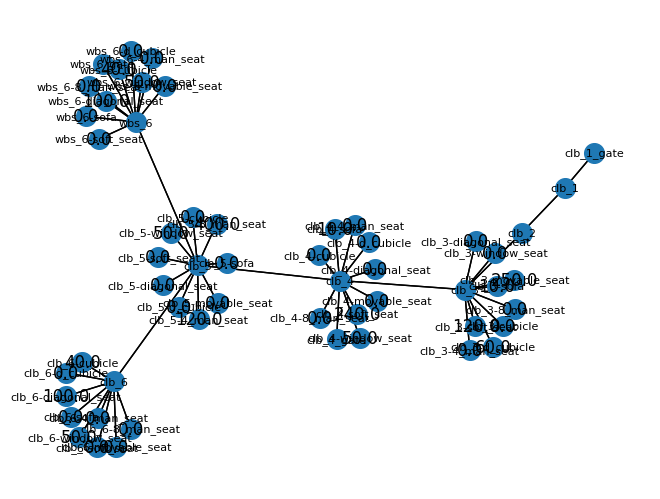

{'clb_3-movable_seat': 250.0,
 'clb_3-4_man_seat': 0.0,
 'clb_3-8_man_seat': 0.0,
 'clb_3-window_seat': 0.0,
 'clb_3-sofa': 10.0,
 'clb_3-soft_seat': 120.0,
 'clb_3-cubicle': 0.0,
 'clb_3-d_cubicle': 60.0,
 'clb_3-diagonal_seat': 0.0,
 'clb_4-movable_seat': 0.0,
 'clb_4-4_man_seat': 0.0,
 'clb_4-8_man_seat': 0.0,
 'clb_4-window_seat': 50.0,
 'clb_4-sofa': 10.0,
 'clb_4-soft_seat': 240.0,
 'clb_4-cubicle': 0.0,
 'clb_4-d_cubicle': 0.0,
 'clb_4-diagonal_seat': 0.0,
 'clb_5-movable_seat': 0.0,
 'clb_5-4_man_seat': 120.0,
 'clb_5-8_man_seat': 400.0,
 'clb_5-window_seat': 50.0,
 'clb_5-sofa': 0.0,
 'clb_5-soft_seat': 0.0,
 'clb_5-cubicle': 0.0,
 'clb_5-d_cubicle': 0.0,
 'clb_5-diagonal_seat': 0.0,
 'clb_6-movable_seat': 0.0,
 'clb_6-4_man_seat': 0.0,
 'clb_6-8_man_seat': 0.0,
 'clb_6-window_seat': 50.0,
 'clb_6-sofa': 0.0,
 'clb_6-soft_seat': 0.0,
 'clb_6-cubicle': 40.0,
 'clb_6-d_cubicle': 0.0,
 'clb_6-diagonal_seat': 100.0,
 'wbs_6-movable_seat': 0.0,
 'wbs_6-4_man_seat': 0.0,
 'wbs_6-8_m

In [16]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities